In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.manifold import TSNE
import plotly.express as px

In [2]:
path_to_read_data = "../Data/cleaned_v4.csv"
data = pd.read_csv(path_to_read_data)
data.head(2)

,Unnamed: 0,Link,Content,Content_cleaned_v1,Length_cleaned_v1,Content_cleaned_v2,Length_cleaned_v2,Label,cc
0,0,https://baochinhphu.vn/thong-diep-3-diem-cua-v...,"Từ ngày 12-13/5/2023 tại Dhaka, Bangladesh đã ...",từ ngày tại dhaka bangladesh đã diễn ra hội_ng...,476,dhaka bangladesh diễn hội_nghị ấn_độ_dương ind...,324,Chinh tri,"Từ ngày 12 - 13 / 5 / 2023 tại Dhaka , Banglad..."
1,1,https://baochinhphu.vn/thu-tuong-pham-minh-chi...,Cùng tham dự cuộc tiếp xúc cử tri có các đại b...,cùng tham_dự cuộc tiếp_xúc cử_tri có các đại_b...,292,cùng tham_dự cuộc tiếp_xúc cử_tri đại_biểu quố...,226,Chinh tri,Cùng tham_dự cuộc tiếp_xúc cử_tri có các đại_b...


In [3]:
import visualizing
visualier = visualizing.Visualizer(data)

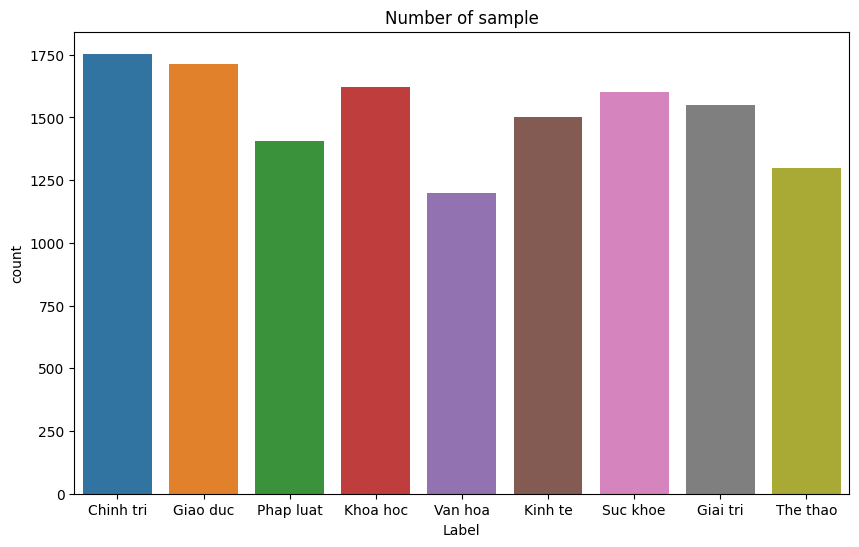

In [4]:
# plt.figure(figsize=(10, 6))
visualier.hist_samples()

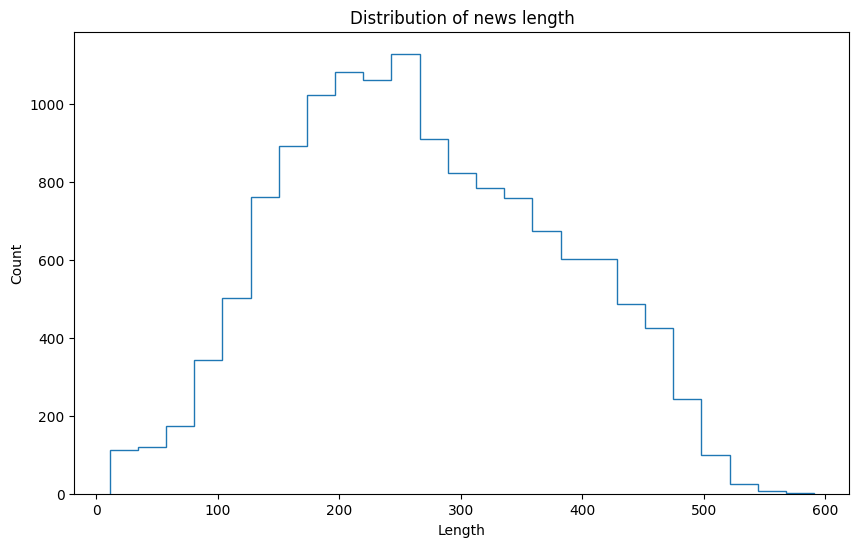

In [5]:
visualier.hist_length("Content_cleaned_v2", True)

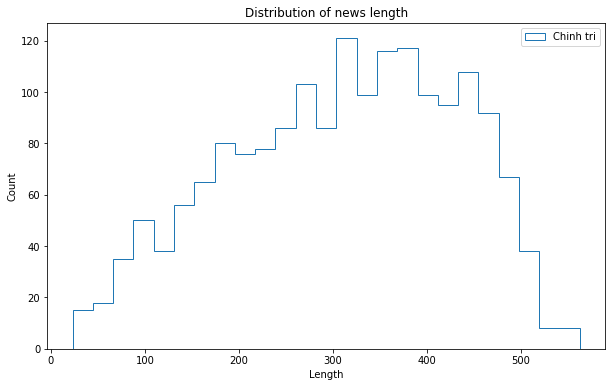

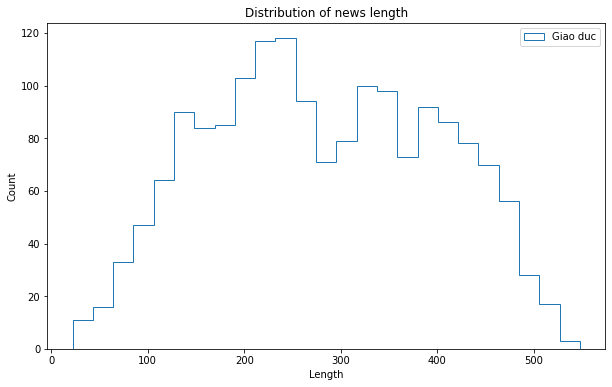

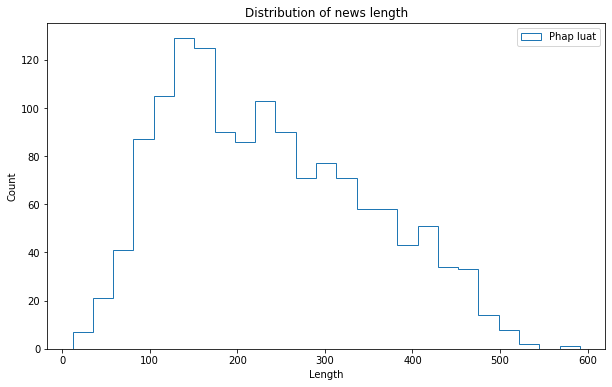

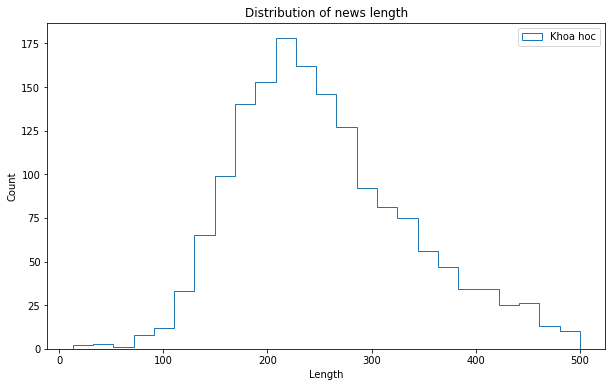

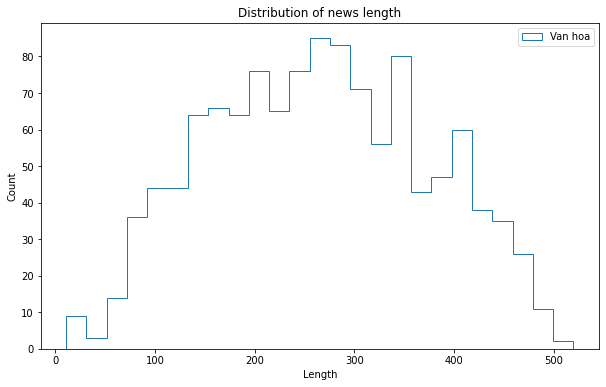

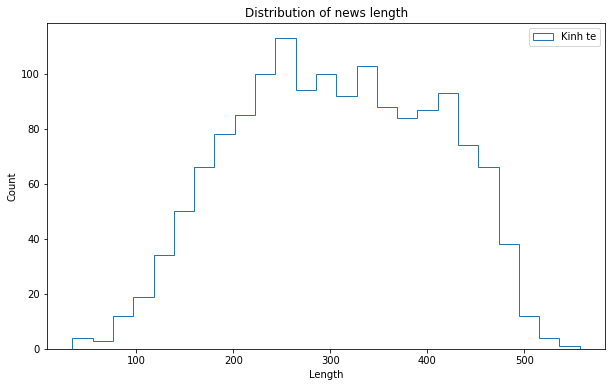

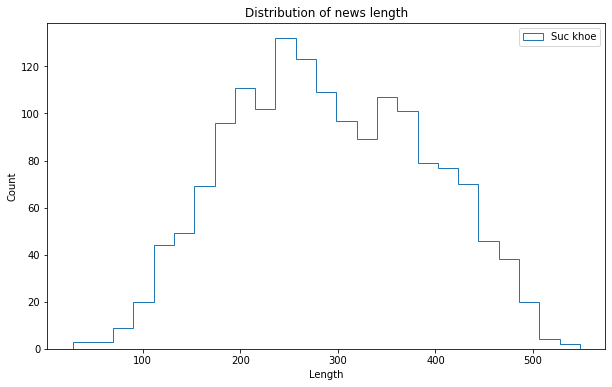

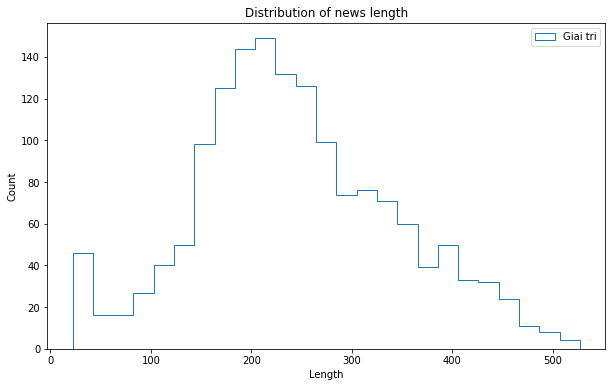

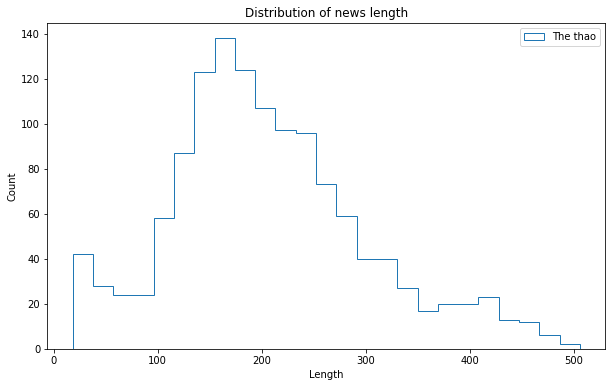

In [6]:
visualier.hist_length("Content_cleaned_v2")                                                                                                                       

In [ ]:
visualier.hist_length("Content_cleaned_v1")

In [ ]:
visualier.hist_length("Content_cleaned_v2")

In [ ]:
visualier.wordBarGraphFunction("Content_cleaned_v1", True)

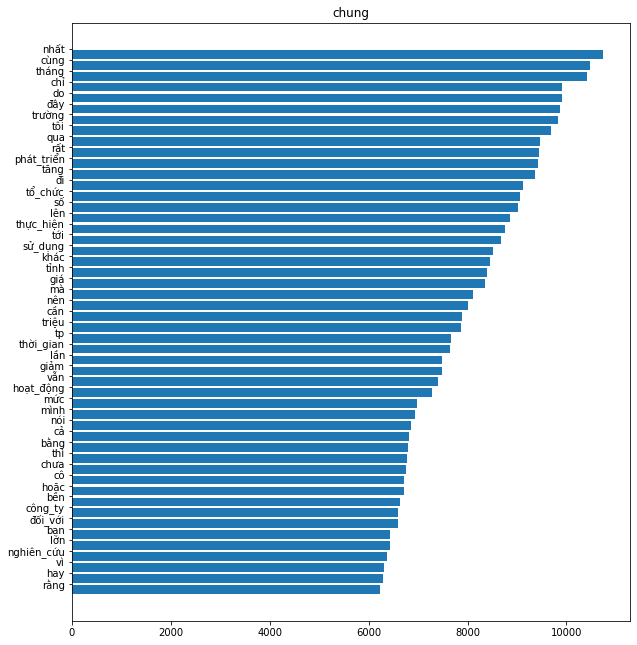

<Figure size 720x432 with 0 Axes>

In [7]:
visualier.wordBarGraphFunction("Content_cleaned_v2", True)

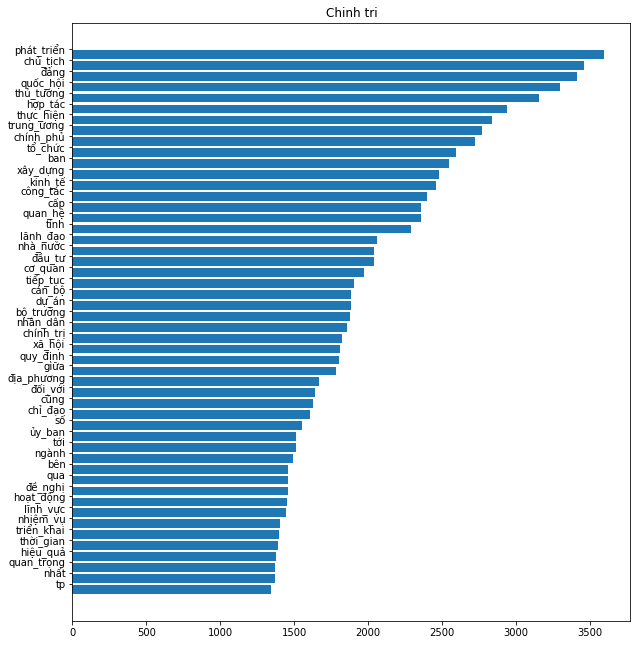

<Figure size 720x432 with 0 Axes>

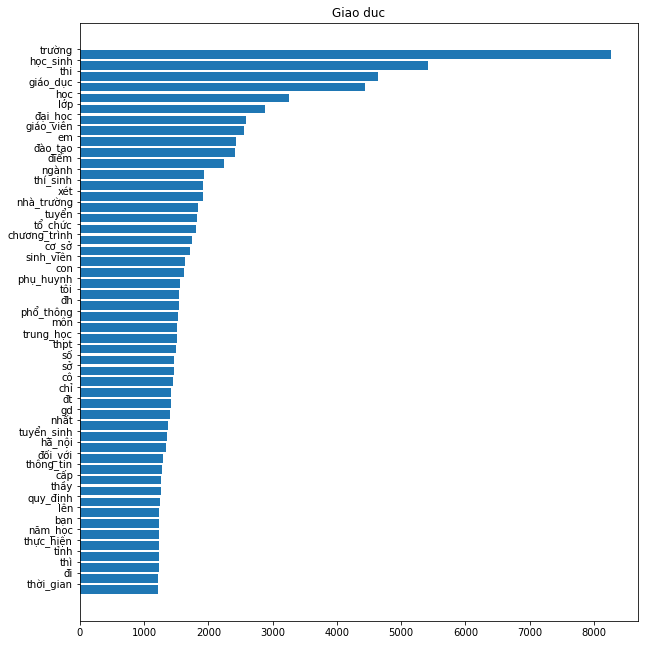

<Figure size 720x432 with 0 Axes>

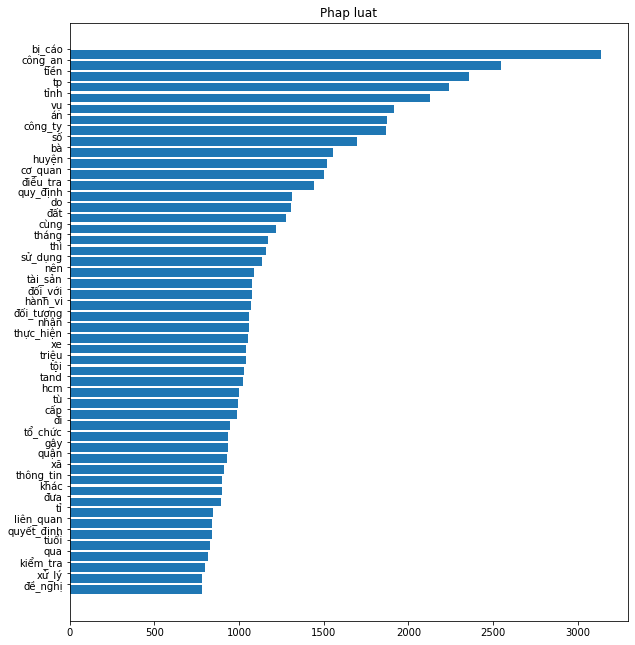

<Figure size 720x432 with 0 Axes>

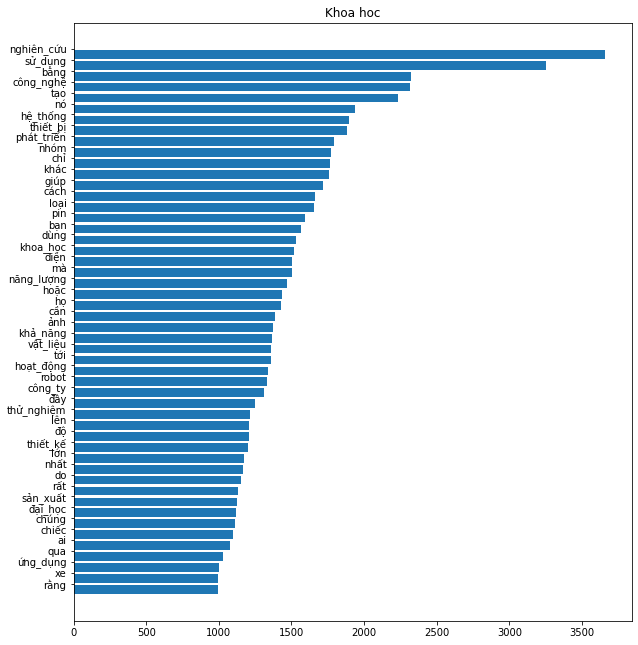

<Figure size 720x432 with 0 Axes>

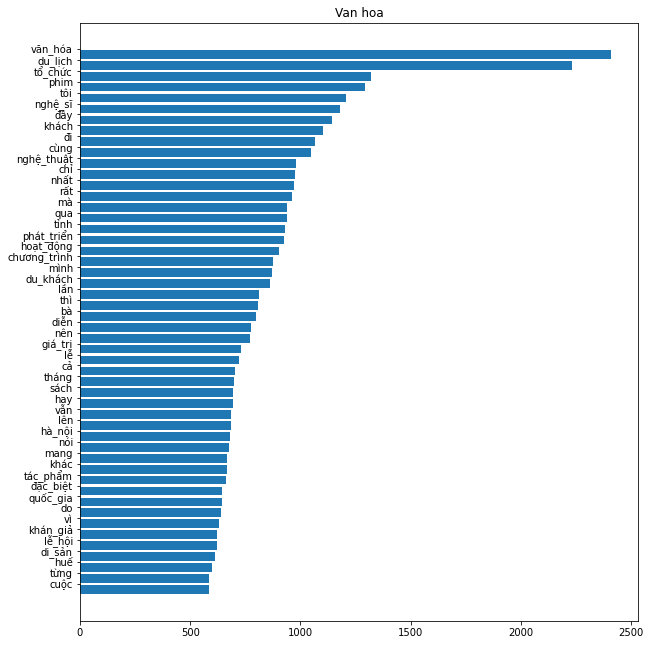

<Figure size 720x432 with 0 Axes>

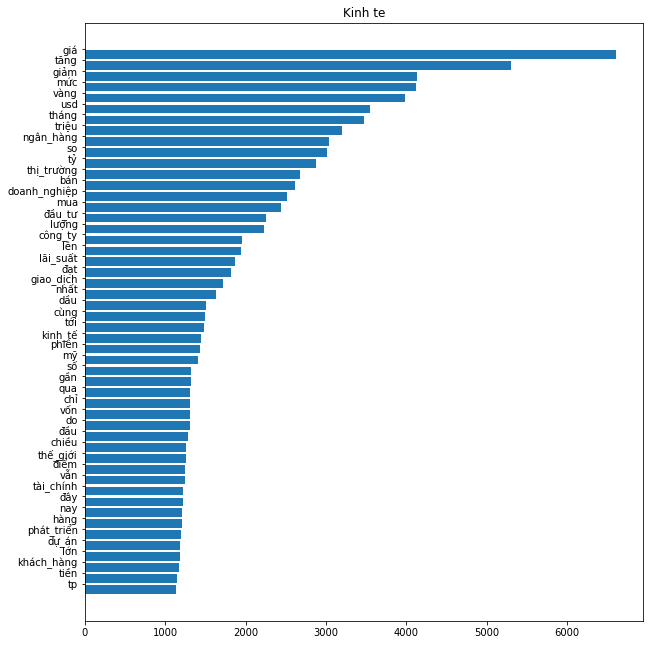

<Figure size 720x432 with 0 Axes>

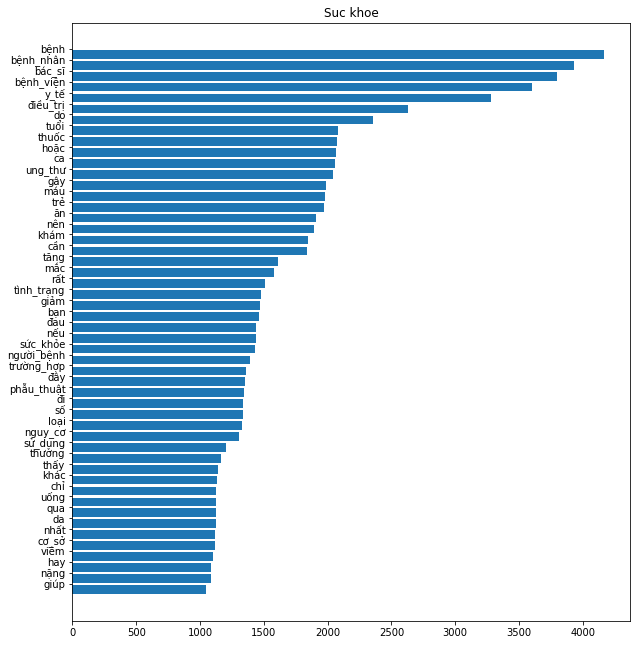

<Figure size 720x432 with 0 Axes>

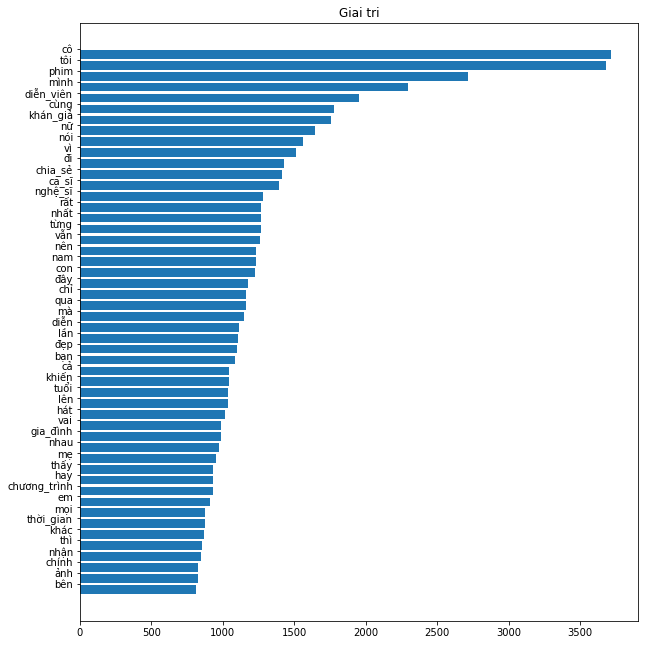

<Figure size 720x432 with 0 Axes>

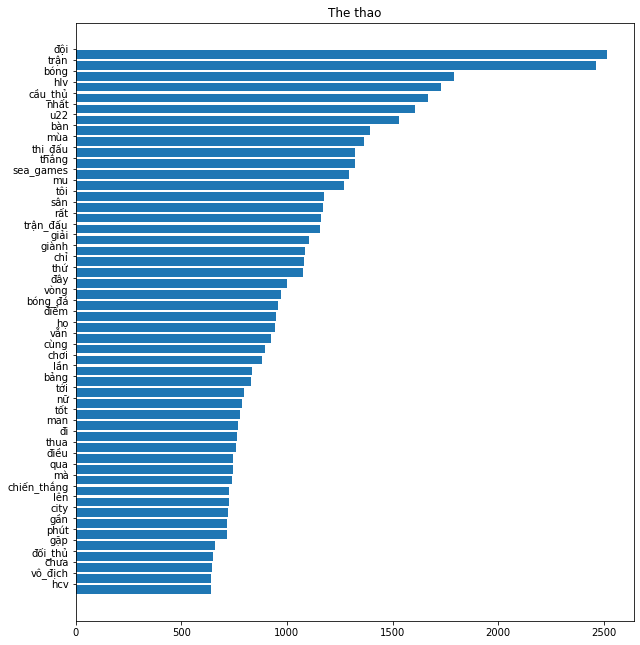

<Figure size 720x432 with 0 Axes>

In [9]:
visualier.wordBarGraphFunction("Content_cleaned_v2")

In [6]:
visualier.plotWordCloud('Content_cleaned_v2', True)

ValueError: Only supported for TrueType fonts

In [ ]:
visualier.plotWordCloud('Content_cleaned_v2')

ValueError: Only supported for TrueType fonts

In [ ]:
len(min_df_terms), len(max_df_terms), len(vocab)

In [ ]:
with open('/Users/DuyHome/HocTap/DATN/FeatureEngineering/vietnamese-stopwords-dash.txt') as f:
            stop_words = [line[:-1] for line in f.readlines()]

In [ ]:
new_docs = []
for doc in data["Content_clean2"]:
  new_doc = " ".join([word for word in doc.split() if word not in min_df_terms])
  new_docs.append(new_doc)
data["content_3"] = new_docs

In [ ]:
data["Length3_remove_mindf"] = data["content_3"].apply(lambda doc: len(str(doc).split()))

In [ ]:
data[data["Label"]=="health"]["Length_content_cleaned"].plot.kde()

In [ ]:
data["Length_content_cleaned"].plot.kde()

In [ ]:
data.boxplot('Length_cleaned_v2')

In [ ]:
length = np.sum(data['Content_cleaned'].apply(lambda x: len(x.split())))
length1 = sum(data['Content'].apply(lambda x: len(x.split())))

In [ ]:
len(set(" ".join(data['content_cleaned_v1']).split()))

In [ ]:
len(set(" ".join(data['Content']).split()))

In [ ]:

plt.plot(length1, label= 'b')
plt.plot(length, label="a")
plt.legend()
plt.show()